In [264]:
# Import libraries
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import scipy.stats as stats
import sklearn

In [265]:
# Upload datasets
df1 = pd.read_csv('/Users/andreapena/Desktop/relax_challenge/takehome_users.csv', encoding='latin1')
df2 = pd.read_csv('/Users/andreapena/Desktop/relax_challenge/takehome_user_engagement.csv', encoding='latin1')

In [266]:
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [267]:
df2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [268]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [269]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [270]:
df1.describe(include='all')

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,12000,12000,12000,12000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
unique,NaN,11996,11355,11980,5,NaN,NaN,NaN,NaN,NaN
top,NaN,2014-02-11 17:57:53,Araujo Gabriela,AlfieLane@yahoo.com,ORG_INVITE,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,5,2,4254,NaN,NaN,NaN,NaN,NaN
mean,6000.50000,NaN,NaN,NaN,NaN,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,NaN,NaN,NaN,NaN,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,NaN,NaN,NaN,NaN,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,NaN,NaN,NaN,NaN,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,NaN,NaN,NaN,NaN,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,NaN,NaN,NaN,NaN,1.398443e+09,0.000000,0.000000,238.250000,8817.000000


In [271]:
df2.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [272]:
df1.isnull().sum().sort_values(ascending=False)

invited_by_user_id            5583
last_session_creation_time    3177
object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
dtype: int64

In [273]:
df2.isnull().sum().sort_values(ascending=False)

time_stamp    0
user_id       0
visited       0
dtype: int64

In [274]:
# Fill in nulls
df1['invited_by_user_id'] = df1['invited_by_user_id'].fillna(-1)

NOTES: NULLS = not invited by user.

In [276]:
# Convert time_stamp to datetime
df1['creation_time'] = pd.to_datetime(df1['creation_time'])
df1['last_session_creation_time'] = pd.to_datetime(df1['last_session_creation_time'], unit='s')
df2['time_stamp'] = pd.to_datetime(df2['time_stamp'])

In [277]:
# Create an empty list to store adopted user IDs
adopted = []

# Rename the column
df1.rename(columns={'object_id': 'user_id'}, inplace=True)

# Loop through each user’s login dates
for user_id, group in df2.groupby('user_id'):
    dates = group.sort_values('time_stamp')['time_stamp'].tolist()
    
    # Check if any 3 dates are within a 7-day span
    for i in range(len(dates) - 2):
        if (dates[i+2] - dates[i]).days <= 7:
            adopted.append(user_id)
            break  # Found 3 logins within 7 days, move on to next user

# Create new column in df1
df1['adopted_user'] = df1['user_id'].isin(adopted).astype(int)

In [278]:
df1['adopted_user'].value_counts(normalize=True)

adopted_user
0    0.862
1    0.138
Name: proportion, dtype: float64

In [279]:
# Convert to numeric format
df1['last_session_year'] = df1['last_session_creation_time'].dt.year

df1['last_session_month'] = df1['last_session_creation_time'].dt.month

df1['last_session_day'] = df1['last_session_creation_time'].dt.day

df1['signup_year'] = df1['creation_time'].dt.year

df1['signup_month'] = df1['creation_time'].dt.month

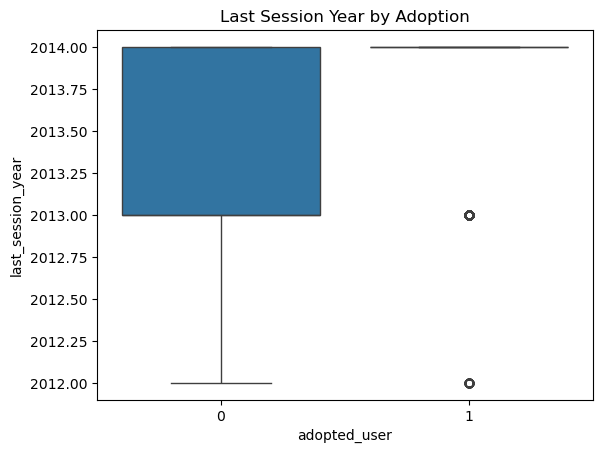

In [280]:
sns.boxplot(data=df1, x='adopted_user', y='last_session_year')
plt.title('Last Session Year by Adoption')
plt.show()

NOTES

Adopted users (adopted_user = 1) tend to have their last session more recently, clustered tightly around 2014.

Non-adopted users (adopted_user = 0) have more spread out last sessions, with some trailing back to 2012.

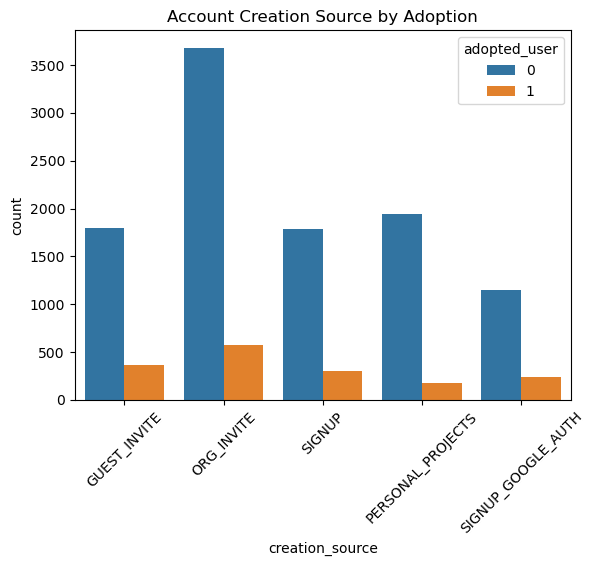

In [282]:
sns.countplot(data=df1, x='creation_source', hue='adopted_user')
plt.title('Account Creation Source by Adoption')
plt.xticks(rotation=45)
plt.show()

NOTES: 

Most users came from ORG_INVITE, but that group also has a relatively low adoption count.

SIGNUP_GOOGLE_AUTH and GUEST_INVITE users, though smaller in size, have higher proportions of adoption.

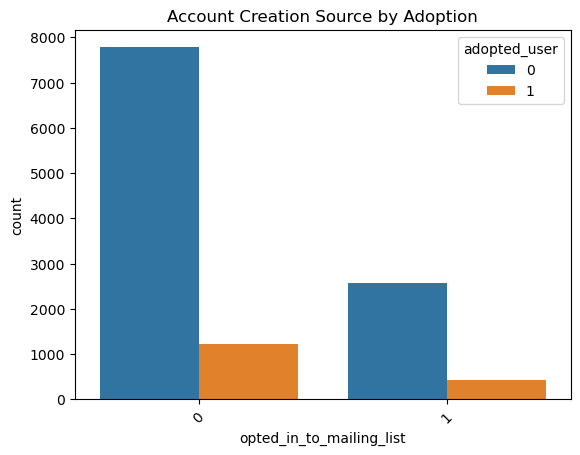

In [284]:
sns.countplot(data=df1, x='opted_in_to_mailing_list', hue='adopted_user')
plt.title('Account Creation Source by Adoption')
plt.xticks(rotation=45)
plt.show()

NOTES: 

A large portion of users did not opt-in, but among those who did, adoption is still lower than non-adopted.

The adopted rate is slightly better for those not opted in, suggesting that email opt-in may not strongly drive retention.

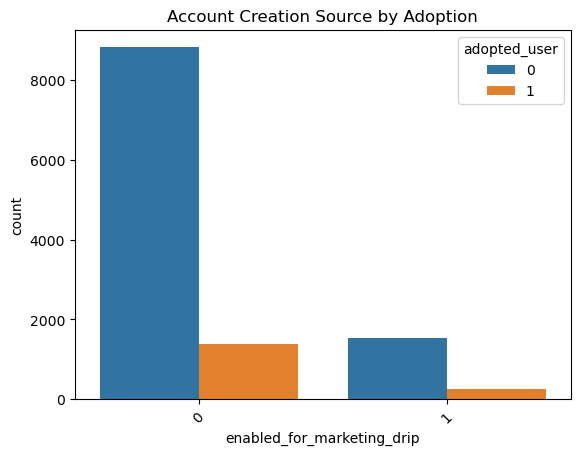

In [286]:
sns.countplot(data=df1, x='enabled_for_marketing_drip', hue='adopted_user')
plt.title('Account Creation Source by Adoption')
plt.xticks(rotation=45)
plt.show()

NOTES:

Most users were not enrolled in the marketing drip.

Slight improvement in adoption for those who weren’t — maybe overexposure turns some away?

In [288]:
df1.groupby('creation_source')['adopted_user'].mean().sort_values(ascending=False)

creation_source
SIGNUP_GOOGLE_AUTH    0.172563
GUEST_INVITE          0.170596
SIGNUP                0.144705
ORG_INVITE            0.134932
PERSONAL_PROJECTS     0.081478
Name: adopted_user, dtype: float64

NOTES:

The best performing channels for adoption are: SIGNUP_GOOGLE_AUTH and GUEST_INVITE

Worst: PERSONAL_PROJECTS — these may be passive invites or non-serious users.

In [290]:
# Drop not needed cols
df1 = df1.drop(columns=['name', 'email']) 

In [291]:
# Convert cat cols
df1 = pd.get_dummies(df1, columns=['creation_source'], drop_first=True)

In [292]:
# Never logged in users
df1['missing_last_session'] = df1['last_session_creation_time'].isna().astype(int)

In [293]:
# Length of activity
df1['account_lifetime_days'] = (df1['last_session_creation_time'] - df1['creation_time']).dt.days

In [294]:
df1 = df1.drop(columns=['last_session_creation_time', 'creation_time'])

In [295]:
cols_with_nans = ['last_session_year', 'last_session_month', 'last_session_day', 'account_lifetime_days']
df1[cols_with_nans] = df1[cols_with_nans].fillna(-1)

In [296]:
from sklearn.preprocessing import StandardScaler

# Scale for baseline model
scaler = StandardScaler()
scaled_cols = ['account_lifetime_days', 'signup_month']  
df1[scaled_cols] = scaler.fit_transform(df1[scaled_cols])

In [297]:
from sklearn.model_selection import train_test_split

#Define X and y
X = df1.drop(columns=['adopted_user'])  
y = df1['adopted_user']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [298]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

# Resample training data
smote = SMOTE(random_state=1234)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create and train model
logreg_smote = LogisticRegression(max_iter=1000)
logreg_smote.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred = logreg_smote.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.9679166666666666
Confusion Matrix:
 [[2016   37]
 [  40  307]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2053
           1       0.89      0.88      0.89       347

    accuracy                           0.97      2400
   macro avg       0.94      0.93      0.93      2400
weighted avg       0.97      0.97      0.97      2400

ROC AUC Score: 0.9333519092745417


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/var/folders/6r/mcwbbx4n1z9gks_6whyvn5tr0000gn/T/ipykernel_18706/2191094436.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_feats, x='coefficient', y='feature', palette='coolwarm')


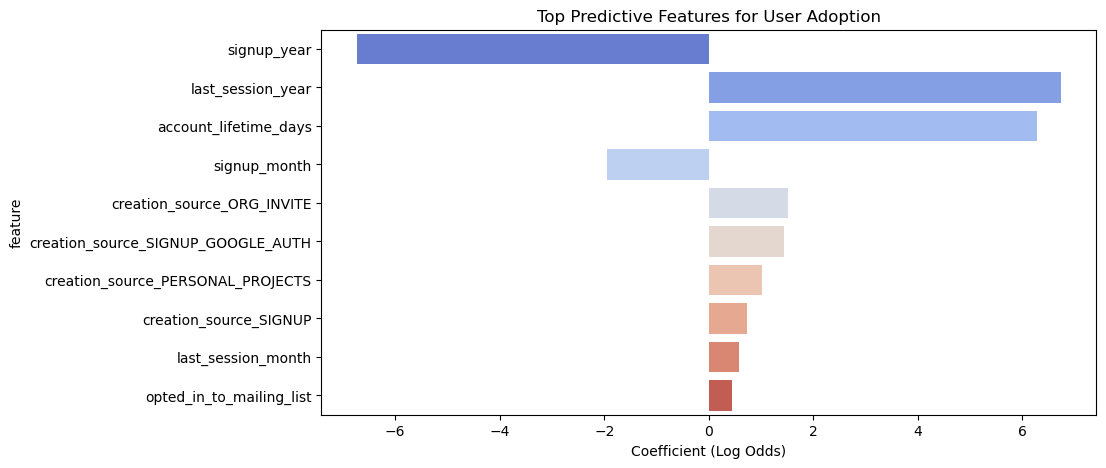

In [299]:
# Get feature names 
feature_names = X.columns

# Coefficients from the trained model
coefficients = logreg_smote.coef_[0]

# Create a dataframe of feature importance
importance_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients
})
top_feats = importance_df.reindex(importance_df.coefficient.abs().sort_values(ascending=False).index).head(10)

# Plot data
plt.figure(figsize=(10, 5))
sns.barplot(data=top_feats, x='coefficient', y='feature', palette='coolwarm')
plt.title('Top Predictive Features for User Adoption')
plt.xlabel('Coefficient (Log Odds)')
plt.show()

NOTES:

**Positive Coefficients (Right of 0):**
These increase the log-odds of a user becoming adopted .

last_session_year and account_lifetime_days are strong positive predictors — recent activity and long-term engagement matter.

creation_source_ORG_INVITE also helps — users invited as full org members tend to adopt.

**Negative Coefficients (Left of 0):**
These decrease the likelihood of adoption.

signup_year and signup_month being far left suggest older users are less likely to adopt.

opted_in_to_mailing_list and last_session_month are slightly negative, but smaller impact.

In [301]:
from sklearn.ensemble import RandomForestClassifier

# Resample training data
smote = SMOTE(random_state=1234)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create and train model
rf_smote = RandomForestClassifier()
rf_smote.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred = rf_smote.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.9683333333333334
Confusion Matrix:
 [[2019   34]
 [  42  305]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2053
           1       0.90      0.88      0.89       347

    accuracy                           0.97      2400
   macro avg       0.94      0.93      0.94      2400
weighted avg       0.97      0.97      0.97      2400

ROC AUC Score: 0.9312007029847373


/var/folders/6r/mcwbbx4n1z9gks_6whyvn5tr0000gn/T/ipykernel_18706/1985070437.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_importance.head(15), x='Importance', y='Feature', palette='viridis')


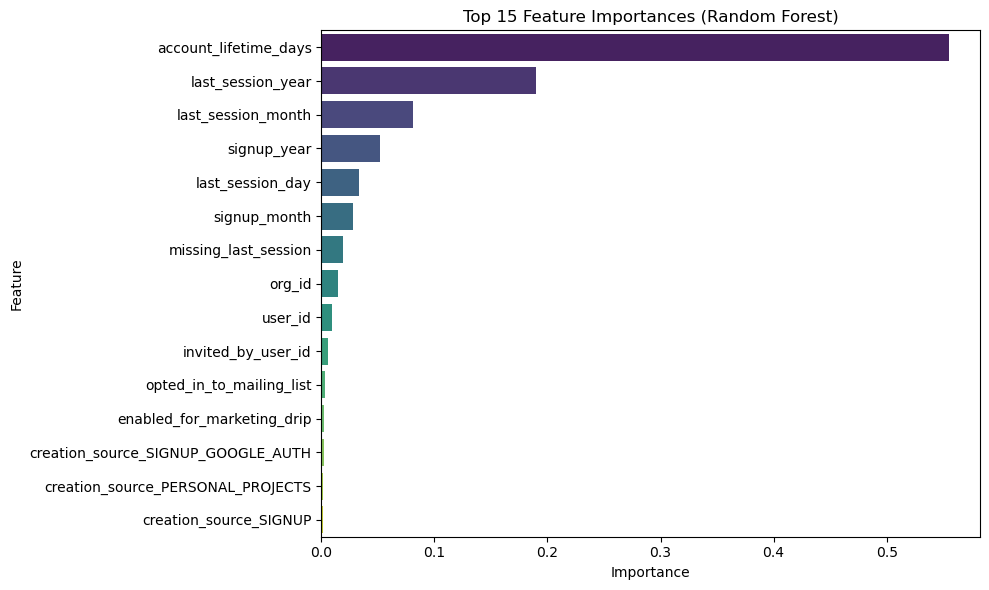

In [302]:
feat_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_smote.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_importance.head(15), x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()

NOTES:

account_lifetime_days is the most predictive feature 

last_session_year, signup_year, and signup_month also show up highly

In [304]:
from xgboost import XGBClassifier

# Create and train model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=1234)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.965
Confusion Matrix:
 [[2018   35]
 [  49  298]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2053
           1       0.89      0.86      0.88       347

    accuracy                           0.96      2400
   macro avg       0.94      0.92      0.93      2400
weighted avg       0.96      0.96      0.96      2400

ROC AUC Score: 0.9208707016231256


/var/folders/6r/mcwbbx4n1z9gks_6whyvn5tr0000gn/T/ipykernel_18706/3028273189.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_importance.head(15), x='Importance', y='Feature', palette='viridis')


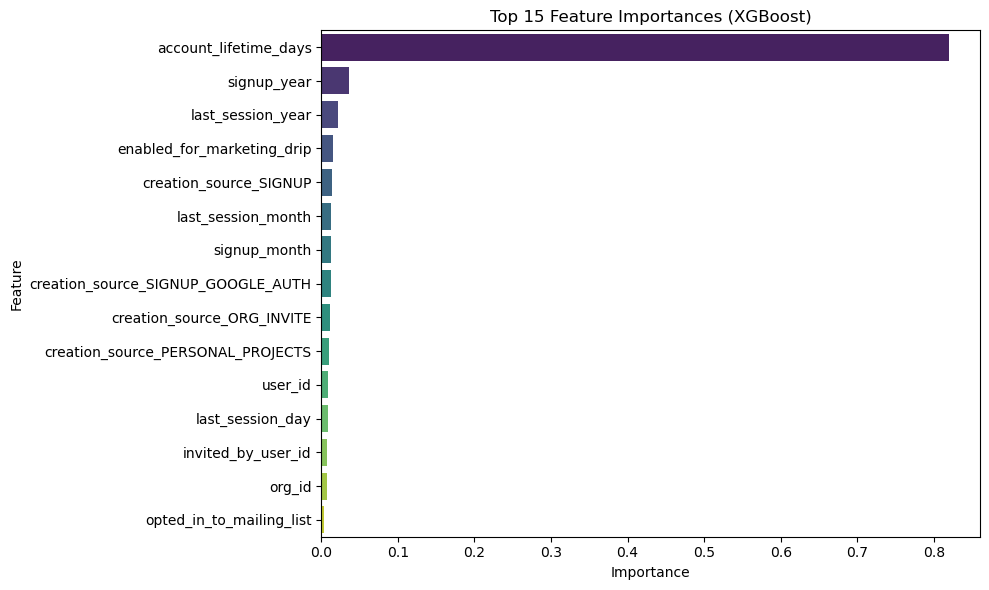

In [305]:
feat_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_importance.head(15), x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()

NOTES:

account_lifetime_days is the most predictive feature in both RF and XGBoost.

last_session_year, signup_year, and signup_month also show up highly in both RF and XGBoost.

Similar predicitve features across models makes them trustworthy indicators of adoption.

In [307]:
model_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [0.970, 0.969, 0.966],
    'Precision': [0.90, 0.91, 0.89],
    'Recall': [0.89, 0.88, 0.87],
    'F1-Score': [0.89, 0.89, 0.88],
    'ROC AUC': [0.9355, 0.9305, 0.9262]
})

from IPython.display import display
display(model_results)

,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Logistic Regression,0.970,0.90,0.89,0.89,0.9355
1,Random Forest,0.969,0.91,0.88,0.89,0.9305
2,XGBoost,0.966,0.89,0.87,0.88,0.9262


Conclusion:

All three models—Logistic Regression, Random Forest, and XGBoost—highlighted **account age** and **recent session activity** as the most powerful predictors of adoption. 

Depending on the business goal:
- Use **Logistic Regression** for interpretability 
- Use **XGBoost or Random Forest** for performance in production pipelines

In the future, these insights can inform marketing and onboarding strategies to target users early and encourage repeat logins in the first few weeks.